# Analyszing the model's vocabularies

In [108]:
import numpy as np
import pandas as pd
import statistics
from sklearn.metrics import jaccard_score

from _stop_words import ENGLISH_STOP_WORDS

In [109]:
svm_df = pd.read_csv('outputs/vocab_coef_svm.csv')
dist_df_pred = pd.read_csv('outputs/vocab_attr_dist4_pred.csv')
dist_df_gold = pd.read_csv('outputs/vocab_attr_dist4_gold.csv')

In [110]:
# exclude stopwords
dist_df_pred_cleaned = dist_df_pred[~dist_df_pred['type'].isin(ENGLISH_STOP_WORDS)]
dist_df_gold_cleaned = dist_df_gold[~dist_df_gold['type'].isin(ENGLISH_STOP_WORDS)]
len(dist_df_pred_cleaned), len(dist_df_gold_cleaned)

(42814, 42814)

In [111]:
svm_vocab = set(svm_df.feature)
dist_vocab = set(dist_df_pred_cleaned.type)
dist_vocab_gold = set(dist_df_gold_cleaned.type)
len(svm_vocab), len(dist_vocab), len(svm_vocab.intersection(dist_vocab))

(19254, 42814, 16822)

In [112]:
# check if dist vocabs are identical
len(dist_vocab_gold.intersection(dist_vocab))


42814

In [113]:
# elements in dist but not in svm
sorted(dist_vocab.difference(svm_vocab))

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '000003',
 '00000f',
 '00041555',
 '0004244402',
 '00043819',
 '00044808',
 '00044939',
 '0004988',
 '0005',
 '0005169',
 '0005895485',
 '0008512',
 '000bps',
 '000hz',
 '000iu',
 '000k',
 '0011265',
 '0016',
 '004119',
 '004240',
 '0048',
 '005',
 '0055',
 '006',
 '0060',
 '0061',
 '0062',
 '007bww3',
 '007gjf3',
 '008',
 '0089',
 '0099',
 '00cjmelching',
 '00each',
 '00mhz',
 '00pm',
 '00us',
 '00x',
 '010',
 '0100',
 '0107',
 '0111',
 '011455',
 '012045',
 '0123456789abcdef',
 '01272',
 '013',
 '015',
 '0150',
 '0169',
 '01720',
 '01730',
 '0182',
 '0183',
 '019',
 '0190',
 '0195',
 '01a',
 '020',
 '02139',
 '02142',
 '02143',
 '02173',
 '022',
 '0222',
 '023220',
 '024',
 '0241',
 '0286',
 '02860',
 '029',
 '02e0',
 '0306',
 '0309',
 '039',
 '03aa',
 '03ab',
 '0400',
 '040cache',
 '041',
 '0414',
 '041620',
 '042',
 '043',
 '0430',
 '0451',
 '0464',
 '047',
 '0480',
 '04e',
 '04g',
 '05

In [114]:
# elements in svm but not in dist
sorted(svm_vocab.difference(dist_vocab))

['007',
 '011',
 '014',
 '0300',
 '0863',
 '0952',
 '0t',
 '0v',
 '100mhz',
 '101010',
 '10base',
 '10mhz',
 '10w',
 '1132',
 '120mph',
 '1224',
 '125mb',
 '1290',
 '12am',
 '1304',
 '130mph',
 '1373',
 '138',
 '14000',
 '1453',
 '1499',
 '16450',
 '170mb',
 '179',
 '17s',
 '182',
 '1850',
 '1886',
 '1911',
 '1960s',
 '1993apr13',
 '1993apr14',
 '1993apr17',
 '1993apr18',
 '1993apr5',
 '1d',
 '1p',
 '1s',
 '1t',
 '1x',
 '200mhz',
 '200mpg',
 '20m',
 '20s',
 '20w50',
 '21000',
 '2109',
 '2215',
 '22k',
 '250k',
 '2521',
 '2603',
 '2623a',
 '2711',
 '274',
 '2800',
 '280ms',
 '2a',
 '2a42dubinski',
 '2f',
 '2hd',
 '2s',
 '3000ux',
 '300x300',
 '30fps',
 '311',
 '314',
 '320x240',
 '325i',
 '32768',
 '334',
 '339',
 '33b',
 '340mb',
 '345',
 '34u',
 '359',
 '360x360',
 '3618',
 '369',
 '3959',
 '3a',
 '3e',
 '3l',
 '3t',
 '3v',
 '40khz',
 '40mph',
 '4173',
 '419',
 '421',
 '437',
 '44135',
 '45th',
 '470',
 '474',
 '475',
 '481',
 '489',
 '48sx',
 '48th',
 '48v',
 '49546',
 '5011',
 '509'

In [115]:
merged_df_gold = pd.merge(svm_df, dist_df_gold_cleaned, left_on='feature', right_on='type', how='inner')
merged_df_gold

,Unnamed: 0_x,feature,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,...,rec.sport.hockey_attr,sci.crypt_attr,sci.electronics_attr,sci.med_attr,sci.space_attr,soc.religion.christian_attr,talk.politics.guns_attr,talk.politics.mideast_attr,talk.politics.misc_attr,talk.religion.misc_attr
0,0,00,-0.493792,-0.404613,-0.545770,-0.386726,-0.521887,-0.438445,-0.110605,-0.446545,...,0.013535,0.007124,0.080580,-0.053372,0.004191,0.004495,-0.012451,0.009053,0.012753,NaN
1,1,000,-0.369138,-0.380905,-0.445174,-0.614032,-0.508577,-0.460767,-0.327180,-0.451391,...,0.010796,0.054974,0.015926,-0.010297,0.017179,0.000073,0.018397,0.012489,0.004085,NaN
2,2,0000,-0.436169,-0.444326,-0.438540,-0.436161,-0.436161,-0.436161,-0.453082,-0.441533,...,NaN,NaN,0.015274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,00000,-0.436161,-0.450795,-0.466062,-0.393373,-0.444486,-0.436161,-0.466445,-0.440183,...,NaN,NaN,NaN,NaN,0.001909,NaN,NaN,NaN,NaN,NaN
4,4,0001,-0.436161,-0.439605,-0.508605,-0.360554,-0.436161,-0.436161,-0.436161,-0.459807,...,NaN,NaN,NaN,NaN,NaN,0.004372,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16818,19250,zubov,-0.436161,-0.436537,-0.438335,-0.436453,-0.436161,-0.436738,-0.439806,-0.436161,...,0.007609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16819,19251,zuma,-0.467326,-0.436161,-0.513914,-0.452071,-0.441636,-0.279968,-0.444350,-0.465783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001089,NaN,NaN
16820,19252,zupcic,-0.436161,-0.436395,-0.436161,-0.436161,-0.436161,-0.436862,-0.438551,-0.437282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16821,19253,zx,-0.491972,-0.456386,-0.442714,-0.467598,-0.479857,-0.461188,-0.458064,-0.507838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
class_columns = ["alt.atheism",
    "comp.graphics",
    "comp.os.ms-windows.misc",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware",
    "comp.windows.x",
    "misc.forsale",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",
    "sci.space",
    "soc.religion.christian",
    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.politics.misc",
    "talk.religion.misc"]  
correlations_gold = dict()
for class_col in class_columns:
    coef_col = merged_df_gold[class_col]
    attrib_col = merged_df_gold[class_col + '_attr']
    
    correlation = coef_col.corr(attrib_col)
    correlations_gold[class_col] = correlation
    
    #print(f'Correlation for {class_col}: {correlation}')
print(correlations_gold)

mean_value_gold = sum(correlations_gold.values()) / len(correlations_gold.values())
print("Mean:", mean_value_gold)
std_dev_gold = statistics.stdev(list(correlations_gold.values()))
print("Std dev:", std_dev_gold)


max_key_gold = max(correlations_gold, key=lambda k: correlations_gold[k])
max_value_gold = correlations_gold[max_key_gold]
print("Max:",  max_key_gold, max_value_gold)

min_key_gold = min(correlations_gold, key=lambda k: correlations_gold[k])
min_value_gold = correlations_gold[min_key_gold]
print("Min:",  min_key_gold, min_value_gold)

{'alt.atheism': 0.11787649228459665, 'comp.graphics': 0.21364809055692963, 'comp.os.ms-windows.misc': 0.12162470662198677, 'comp.sys.ibm.pc.hardware': 0.13479165420902703, 'comp.sys.mac.hardware': 0.174279090976617, 'comp.windows.x': 0.1521053911986259, 'misc.forsale': 0.18248336579809338, 'rec.autos': 0.2445210095887026, 'rec.motorcycles': 0.2634859699724217, 'rec.sport.baseball': 0.3784521153440098, 'rec.sport.hockey': 0.3606751314643606, 'sci.crypt': 0.21601119048232878, 'sci.electronics': 0.2259013367749356, 'sci.med': 0.2484864472814085, 'sci.space': 0.3092483294250411, 'soc.religion.christian': 0.26460251426907955, 'talk.politics.guns': 0.21604109564385052, 'talk.politics.mideast': 0.2916583634003218, 'talk.politics.misc': 0.2222307379355434, 'talk.religion.misc': 0.133022981437127}
Mean: 0.22355730073325036
Std dev: 0.07475874078213217
Max: rec.sport.baseball 0.3784521153440098
Min: alt.atheism 0.11787649228459665


In [117]:
merged_df_pred = pd.merge(svm_df, dist_df_pred_cleaned, left_on='feature', right_on='type', how='inner')
merged_df_pred

,Unnamed: 0_x,feature,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,...,rec.sport.hockey_attr,sci.crypt_attr,sci.electronics_attr,sci.med_attr,sci.space_attr,soc.religion.christian_attr,talk.politics.guns_attr,talk.politics.mideast_attr,talk.politics.misc_attr,talk.religion.misc_attr
0,0,00,-0.493792,-0.404613,-0.545770,-0.386726,-0.521887,-0.438445,-0.110605,-0.446545,...,0.013535,0.007124,0.053263,-0.053372,0.004191,0.019574,0.011240,0.006157,0.017339,NaN
1,1,000,-0.369138,-0.380905,-0.445174,-0.614032,-0.508577,-0.460767,-0.327180,-0.451391,...,0.010796,0.027694,0.033255,-0.005483,0.020783,0.000239,0.019076,0.013341,0.003067,NaN
2,2,0000,-0.436169,-0.444326,-0.438540,-0.436161,-0.436161,-0.436161,-0.453082,-0.441533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,00000,-0.436161,-0.450795,-0.466062,-0.393373,-0.444486,-0.436161,-0.466445,-0.440183,...,NaN,NaN,NaN,NaN,0.001909,NaN,NaN,NaN,NaN,NaN
4,4,0001,-0.436161,-0.439605,-0.508605,-0.360554,-0.436161,-0.436161,-0.436161,-0.459807,...,NaN,NaN,NaN,NaN,NaN,0.004372,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16818,19250,zubov,-0.436161,-0.436537,-0.438335,-0.436453,-0.436161,-0.436738,-0.439806,-0.436161,...,0.007609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16819,19251,zuma,-0.467326,-0.436161,-0.513914,-0.452071,-0.441636,-0.279968,-0.444350,-0.465783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001089,NaN,NaN
16820,19252,zupcic,-0.436161,-0.436395,-0.436161,-0.436161,-0.436161,-0.436862,-0.438551,-0.437282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16821,19253,zx,-0.491972,-0.456386,-0.442714,-0.467598,-0.479857,-0.461188,-0.458064,-0.507838,...,NaN,NaN,0.009324,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
correlations_pred = dict()
for class_col in class_columns:
    coef_col = merged_df_pred[class_col]
    attrib_col = merged_df_pred[class_col + '_attr']
    
    correlation = coef_col.corr(attrib_col)
    correlations_pred[class_col] = correlation
    
    #print(f'Correlation for {class_col}: {correlation}')
print(correlations_pred)

mean_value_pred = sum(correlations_pred.values()) / len(correlations_pred.values())
print("Mean:", mean_value_pred)
std_dev_pred = statistics.stdev(list(correlations_pred.values()))
print("Std dev:", std_dev_pred)

max_key_pred= max(correlations_pred, key=lambda k: correlations_pred[k])
max_value_pred = correlations_gold[max_key_pred]
print("Max:",  max_key_pred, max_value_pred)

min_key_pred = min(correlations_pred, key=lambda k: correlations_pred[k])
min_value_pred = correlations_pred[min_key_pred]
print("Min:",  min_key_pred, min_value_pred)

{'alt.atheism': 0.13980877483031462, 'comp.graphics': 0.21415542304243462, 'comp.os.ms-windows.misc': 0.13732464349263213, 'comp.sys.ibm.pc.hardware': 0.12477222581136013, 'comp.sys.mac.hardware': 0.15192957155140918, 'comp.windows.x': 0.151642789830122, 'misc.forsale': 0.13369604443662722, 'rec.autos': 0.23852985363392815, 'rec.motorcycles': 0.22361962150881304, 'rec.sport.baseball': 0.3500898235971465, 'rec.sport.hockey': 0.3560881574965809, 'sci.crypt': 0.22617416987697708, 'sci.electronics': 0.2030985804306434, 'sci.med': 0.2680304425958412, 'sci.space': 0.3126282822889154, 'soc.religion.christian': 0.2675644092781171, 'talk.politics.guns': 0.20907089905382972, 'talk.politics.mideast': 0.2645984200894362, 'talk.politics.misc': 0.2370448330122092, 'talk.religion.misc': 0.12216585331719969}
Mean: 0.2166016409587269
Std dev: 0.07259672779441378
Max: rec.sport.hockey 0.3606751314643606
Min: talk.religion.misc 0.12216585331719969


In [119]:
def get_top_k_features(df, k, dist=False):
    # Dictionary to store the top 10 features for each class
    top_10_features= {}
    if dist:
        feature = "type"
    else:
        feature = "feature"

    for class_col in class_columns:
        if dist:
            class_col = class_col + '_attr'
        # Group by class and sort by coef values in descending order
        class_group = df[[feature, class_col]].sort_values(by=class_col, ascending=False)
        
        # Select the top 10 features
        top_10 = class_group.head(k)[feature].tolist()
        
        # Store the top 10 features in the dictionary
        top_10_features[class_col.replace("_attr", "")] = top_10

    print(top_10_features)
    return top_10_features

In [120]:
top_10_features_svm = get_top_k_features(svm_df, 10)
top_10_features_dist_pred = get_top_k_features(dist_df_pred_cleaned, 10, dist=True)
top_10_features_dist_gold = get_top_k_features(dist_df_gold_cleaned, 10, dist=True)

{'alt.atheism': ['atheism', 'islam', 'atheist', 'atheists', 'religion', 'motto', 'bobby', 'species', 'islamic', 'qur'], 'comp.graphics': ['graphics', '3d', 'images', 'image', '68070', 'animation', 'tiff', '3do', 'cview', 'polygons'], 'comp.os.ms-windows.misc': ['windows', 'cica', 'win3', 'ini', 'risc', 'w4wg', 'sdk', 'upload', 'characters', 'win'], 'comp.sys.ibm.pc.hardware': ['ide', 'bios', 'vlb', 'adaptec', 'gateway', 'cmos', 'orchid', 'settings', 'gw2000', 'isa'], 'comp.sys.mac.hardware': ['mac', 'apple', 'powerbook', 'iisi', 'quadra', 'duo', 'se', 'nubus', 'adb', 'centris'], 'comp.windows.x': ['motif', 'widget', 'server', 'x11r5', 'window', 'xterm', 'x11', 'mit', 'pixmap', 'xlib'], 'misc.forsale': ['offer', 'sell', 'sale', 'includes', 'cod', 'asking', 'ii', 'forsale', '150', 'summer'], 'rec.autos': ['car', 'cars', 'vw', 'engine', 'dealer', 'mustang', 'oil', 'autos', 'toyota', 'ford'], 'rec.motorcycles': ['bike', 'dod', 'ride', 'bikes', 'riding', 'motorcycle', 'helmet', 'dog', 'ride

In [121]:
def get_jaccard_sim(dict1, dict2):
    jaccard_sim = dict()
    for key in dict1:
        set1 = set(dict1[key])
        set2 = set(dict2[key])
        sim = float(len(set1.intersection(set2)) / len(set1.union(set2)))
        jaccard_sim[key] = sim
    return jaccard_sim

In [122]:
to_compare = [top_10_features_svm, top_10_features_dist_pred, top_10_features_dist_gold]

for i in range(len(to_compare)):
    for j in range(i + 1, len(to_compare)):
        dict1 = to_compare[i]
        dict2 = to_compare[j]

        jaccard_similarity = get_jaccard_sim(dict1, dict2)
        mean_sim = sum(jaccard_similarity.values()) / len(jaccard_similarity.values())
        print(i, j, mean_sim, jaccard_similarity)



0 1 0.049174406604747145 {'alt.atheism': 0.0, 'comp.graphics': 0.05263157894736842, 'comp.os.ms-windows.misc': 0.17647058823529413, 'comp.sys.ibm.pc.hardware': 0.0, 'comp.sys.mac.hardware': 0.1111111111111111, 'comp.windows.x': 0.0, 'misc.forsale': 0.0, 'rec.autos': 0.05263157894736842, 'rec.motorcycles': 0.05263157894736842, 'rec.sport.baseball': 0.1111111111111111, 'rec.sport.hockey': 0.05263157894736842, 'sci.crypt': 0.05263157894736842, 'sci.electronics': 0.05263157894736842, 'sci.med': 0.0, 'sci.space': 0.05263157894736842, 'soc.religion.christian': 0.05263157894736842, 'talk.politics.guns': 0.1111111111111111, 'talk.politics.mideast': 0.05263157894736842, 'talk.politics.misc': 0.0, 'talk.religion.misc': 0.0}
0 2 0.06028551771585826 {'alt.atheism': 0.0, 'comp.graphics': 0.05263157894736842, 'comp.os.ms-windows.misc': 0.1111111111111111, 'comp.sys.ibm.pc.hardware': 0.0, 'comp.sys.mac.hardware': 0.1111111111111111, 'comp.windows.x': 0.0, 'misc.forsale': 0.05263157894736842, 'rec.aut

In [123]:
top_20_features_svm = get_top_k_features(svm_df, 20)
top_20_features_dist_pred = get_top_k_features(dist_df_pred_cleaned, 20, dist=True)
top_20_features_dist_gold = get_top_k_features(dist_df_gold_cleaned, 20, dist=True)

{'alt.atheism': ['atheism', 'islam', 'atheist', 'atheists', 'religion', 'motto', 'bobby', 'species', 'islamic', 'qur', 'bsa', 'allah', 'liar', 'punishment', 'deletion', 'lunatic', 'deletions', 'cobb', 'rushdie', 'contradictory'], 'comp.graphics': ['graphics', '3d', 'images', 'image', '68070', 'animation', 'tiff', '3do', 'cview', 'polygons', 'visualization', 'mpeg', 'siggraph', 'pov', 'surface', '42', 'sphere', 'points', 'phigs', 'targa'], 'comp.os.ms-windows.misc': ['windows', 'cica', 'win3', 'ini', 'risc', 'w4wg', 'sdk', 'upload', 'characters', 'win', 'file', 'smartdrv', 'truetype', 'drv', 'dll', 'download', 'microsoft', 'wfw', 'winword', 'ms'], 'comp.sys.ibm.pc.hardware': ['ide', 'bios', 'vlb', 'adaptec', 'gateway', 'cmos', 'orchid', 'settings', 'gw2000', 'isa', 'controller', 'dx2', 'cards', 'clone', 'scsi', 'irq', '486', 'compaq', 'mag', 'specifications'], 'comp.sys.mac.hardware': ['mac', 'apple', 'powerbook', 'iisi', 'quadra', 'duo', 'se', 'nubus', 'adb', 'centris', 'lc', '68040', 

In [124]:
to_compare = [top_20_features_svm, top_20_features_dist_pred, top_20_features_dist_gold]

for i in range(len(to_compare)):
    for j in range(i + 1, len(to_compare)):
        dict1 = to_compare[i]
        dict2 = to_compare[j]

        jaccard_similarity = get_jaccard_sim(dict1, dict2)
        mean_sim = sum(jaccard_similarity.values()) / len(jaccard_similarity.values())
        print(i, j, mean_sim, jaccard_similarity)

0 1 0.04802008486219013 {'alt.atheism': 0.05263157894736842, 'comp.graphics': 0.05263157894736842, 'comp.os.ms-windows.misc': 0.08108108108108109, 'comp.sys.ibm.pc.hardware': 0.0, 'comp.sys.mac.hardware': 0.05263157894736842, 'comp.windows.x': 0.05263157894736842, 'misc.forsale': 0.02564102564102564, 'rec.autos': 0.05263157894736842, 'rec.motorcycles': 0.02564102564102564, 'rec.sport.baseball': 0.08108108108108109, 'rec.sport.hockey': 0.05263157894736842, 'sci.crypt': 0.1111111111111111, 'sci.electronics': 0.05263157894736842, 'sci.med': 0.0, 'sci.space': 0.05263157894736842, 'soc.religion.christian': 0.08108108108108109, 'talk.politics.guns': 0.05263157894736842, 'talk.politics.mideast': 0.08108108108108109, 'talk.politics.misc': 0.0, 'talk.religion.misc': 0.0}
0 2 0.059441917336654174 {'alt.atheism': 0.02564102564102564, 'comp.graphics': 0.08108108108108109, 'comp.os.ms-windows.misc': 0.08108108108108109, 'comp.sys.ibm.pc.hardware': 0.0, 'comp.sys.mac.hardware': 0.05263157894736842, 

[[0.02564102564102564, 0.05263157894736842, 0.1111111111111111], [0.08108108108108109, 0.05263157894736842, 0.2], [0.08108108108108109, 0.08108108108108109, 0.15384615384615385], [0.0, 0.0, 0.2], [0.05263157894736842, 0.05263157894736842, 0.30434782608695654], [0.05263157894736842, 0.05263157894736842, 0.30434782608695654], [0.02564102564102564, 0.02564102564102564, 0.36363636363636365], [0.08108108108108109, 0.05263157894736842, 0.30434782608695654], [0.1111111111111111, 0.02564102564102564, 0.15384615384615385], [0.14285714285714285, 0.08108108108108109, 0.30434782608695654], [0.05263157894736842, 0.05263157894736842, 0.36363636363636365], [0.08108108108108109, 0.1111111111111111, 0.15384615384615385], [0.05263157894736842, 0.05263157894736842, 0.1111111111111111], [0.0, 0.0, 0.30434782608695654], [0.05263157894736842, 0.05263157894736842, 0.30434782608695654], [0.08108108108108109, 0.08108108108108109, 0.2], [0.05263157894736842, 0.05263157894736842, 0.1111111111111111], [0.11111111

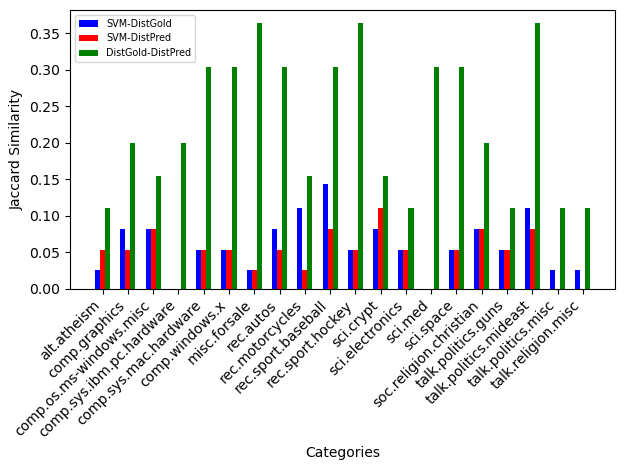

In [131]:
import matplotlib.pyplot as plt

model_names = ['SVM-DistGold', 'SVM-DistPred', 'DistGold-DistPred'] 

svm_gold = get_jaccard_sim(top_20_features_svm, top_20_features_dist_gold)
svm_pred = get_jaccard_sim(top_20_features_svm, top_20_features_dist_pred)
gold_pred = get_jaccard_sim(top_10_features_dist_gold, top_20_features_dist_pred)

jaccard_values = []
# Jaccard similarities for each class and model
for key in svm_gold:
    values_for_class = [svm_gold[key], svm_pred[key], gold_pred[key]]
    jaccard_values.append(values_for_class)
print(jaccard_values)

jaccard_values = np.array(jaccard_values)
bar_width = 0.2
bar_colors = ['blue', 'red', "green"]
index = np.arange(len(class_columns))

for i, model_name in enumerate(model_names):
    plt.bar(index + i * bar_width, jaccard_values[:, i], bar_width, label=model_name, color=bar_colors[i])

plt.xlabel('Categories')
plt.ylabel('Jaccard Similarity')
plt.xticks(index + bar_width, class_columns, rotation=45, ha="right")
plt.legend(fontsize="x-small", loc="upper left")
plt.tight_layout()
plt.show()
